In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/ethereum_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1660,2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,25470760032
1661,2022-05-28,1724.635986,1757.941772,1724.635986,1757.941772,1757.941772,23214777872
1662,2022-05-29,1792.184448,1818.776611,1765.937378,1812.031006,1812.031006,10642556101
1663,2022-05-30,1811.885986,2005.210815,1804.456055,1996.441284,1996.441284,19580808705


In [5]:
df = df[['Date', 'Close']]
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_54659/263429702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [6]:
df

,Date,Close
0,2017-11-09,0.050040
1,2017-11-10,0.045464
2,2017-11-11,0.048727
3,2017-11-12,0.047295
4,2017-11-13,0.049158
...,...,...
1660,2022-05-27,0.347016
1661,2022-05-28,0.354000
1662,2022-05-29,0.365441
1663,2022-05-30,0.404446


In [7]:
lstm_1 = load_model('Models/lstm_1.h5')
lstm_3 = load_model('Models/lstm_3.h5')
lstm_7 = load_model('Models/lstm_7.h5')
lstm_15 = load_model('Models/lstm_15.h5')
lstm_30 = load_model('Models/lstm_30.h5')
lstm_60 = load_model('Models/lstm_60.h5')

gru_1 = load_model('Models/gru_1.h5')
gru_3 = load_model('Models/gru_3.h5')
gru_7 = load_model('Models/gru_7.h5')
gru_15 = load_model('Models/gru_15.h5')
gru_30 = load_model('Models/gru_30.h5')
gru_60 = load_model('Models/gru_60.h5')

In [8]:
# creating a look back window of 60 days 
X, y = create_look_back_arrays(df, 60)

In [9]:
X.shape, y.shape

((1605, 60, 1), (1605, 1))

In [10]:
lstm_1_predictions = []
lstm_3_predictions = []
lstm_7_predictions = []
lstm_15_predictions = []
lstm_30_predictions = []
lstm_60_predictions = []

gru_1_predictions = []
gru_3_predictions = []
gru_7_predictions = []
gru_15_predictions = []
gru_30_predictions = []
gru_60_predictions = []

In [11]:
X.shape

(1605, 60, 1)

In [12]:
X[0], y[0]

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [13]:
X[0][-1].reshape(1, 1)

array([[0.22608115]])

In [14]:
lstm_1.predict(X[0][-1].reshape(1, 1, 1)), y[0]

1/1 [==============================] - 0s 150ms/step


(array([[0.22568408]], dtype=float32), array([0.22509972]))

In [15]:
scaler.inverse_transform(lstm_1.predict(X[0][-1].reshape(1, 1, 1)))

1/1 [==============================] - 0s 9ms/step


array([[1151.2927]], dtype=float32)

In [16]:
scaler.inverse_transform(y[0].reshape(1, 1))

array([[1148.5300293]])

In [17]:
X[0], X[0, -3:, -1].reshape(-1, 3, 1)

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [18]:
# Creating the list of X for each model.
# Since all the models predict the next day's closing price and have differnet look back windows,
# we'll use the 60 day look back window and extract the look back window for each model
# For example, in the 60 day look back window, if we want to use the 3 day model, we'll use the last 3 days

# Extracting the different look back windows for each model
one_day_window = X[:, -1, -1].reshape(-1, 1, 1)
three_day_window = X[:, -3:, -1].reshape(-1, 3, 1)
seven_day_window = X[:, -7:, -1].reshape(-1, 7, 1)
fifteen_day_window = X[:, -15:, -1].reshape(-1, 15, 1)
thirty_day_window = X[:, -30:, -1].reshape(-1, 30, 1)
sixty_day_window = X[:, :, -1].reshape(-1, 60, 1)

In [19]:
# Predict the prices through the model now
lstm_1_predictions = scaler.inverse_transform(lstm_1.predict(one_day_window))
lstm_3_predictions = scaler.inverse_transform(lstm_3.predict(three_day_window))
lstm_7_predictions = scaler.inverse_transform(lstm_7.predict(seven_day_window))
lstm_15_predictions = scaler.inverse_transform(lstm_15.predict(fifteen_day_window))
lstm_30_predictions = scaler.inverse_transform(lstm_30.predict(thirty_day_window))
lstm_60_predictions = scaler.inverse_transform(lstm_60.predict(sixty_day_window))

gru_1_predictions = scaler.inverse_transform(gru_1.predict(one_day_window))
gru_3_predictions = scaler.inverse_transform(gru_3.predict(three_day_window))
gru_7_predictions = scaler.inverse_transform(gru_7.predict(seven_day_window))
gru_15_predictions = scaler.inverse_transform(gru_15.predict(fifteen_day_window))
gru_30_predictions = scaler.inverse_transform(gru_30.predict(thirty_day_window))
gru_60_predictions = scaler.inverse_transform(gru_60.predict(sixty_day_window))

51/51 [==============================] - 0s 2ms/step


In [20]:
lstm_1_predictions.shape, lstm_3_predictions.shape, lstm_7_predictions.shape, lstm_15_predictions.shape, lstm_30_predictions.shape, lstm_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [21]:
gru_1_predictions.shape, gru_3_predictions.shape, gru_7_predictions.shape, gru_15_predictions.shape, gru_30_predictions.shape, gru_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [22]:
y.shape

(1605, 1)

In [23]:
# Creating a dataframe with all the predictions and the actual values
predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1), 
                               'LSTM_1': lstm_1_predictions.reshape(-1), 
                               'LSTM_3': lstm_3_predictions.reshape(-1),
                               'LSTM_7': lstm_7_predictions.reshape(-1),
                               'LSTM_15': lstm_15_predictions.reshape(-1),
                               'LSTM_30': lstm_30_predictions.reshape(-1),
                               'LSTM_60': lstm_60_predictions.reshape(-1),
                               'GRU_1': gru_1_predictions.reshape(-1),
                               'GRU_3': gru_3_predictions.reshape(-1),
                               'GRU_7': gru_7_predictions.reshape(-1),
                               'GRU_15': gru_15_predictions.reshape(-1),
                               'GRU_30': gru_30_predictions.reshape(-1),
                               'GRU_60': gru_60_predictions.reshape(-1)}, index = df['Date'][60:])

In [24]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2018-01-08,1148.530029,1151.292725,1066.183594,1070.129272,1130.488647,1128.407227,1132.074219,1172.512817,1099.004517,1094.596191,1136.014771,1165.849609,1183.460571
2018-01-09,1299.739990,1146.560913,1124.877686,1114.155762,1159.411377,1153.954224,1160.680908,1167.806763,1140.588501,1135.967041,1164.417480,1187.636475,1207.228394
2018-01-10,1255.819946,1301.208984,1211.490234,1189.457275,1273.839355,1268.908203,1270.567993,1321.267090,1237.922607,1225.503052,1279.785767,1309.666992,1326.766479
2018-01-11,1154.930054,1256.194824,1252.209473,1234.192505,1281.887207,1273.279053,1280.757935,1276.672119,1263.230835,1260.823853,1286.156860,1305.307129,1325.083130
2018-01-12,1273.199951,1153.087891,1286.971313,1232.685547,1204.234253,1197.003296,1211.812500,1174.298096,1222.585815,1230.469727,1193.228516,1208.345581,1233.208374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,1724.922852,1823.419434,1984.048340,1957.770630,1868.820801,1857.573364,1888.720459,1834.355347,1907.133423,1929.118530,1848.559937,1850.788452,1872.991943
2022-05-28,1757.941772,1740.947876,1906.893799,1887.287231,1771.110596,1762.019165,1792.510010,1753.833862,1813.540771,1842.557495,1745.796509,1753.035645,1776.146118
2022-05-29,1812.031006,1775.392578,1828.276123,1843.052490,1771.421143,1761.093628,1783.891724,1787.487549,1781.093994,1809.923828,1758.573486,1769.369507,1787.059448


# Machine Learning Models

In [25]:
scaler = MinMaxScaler()
predictions_df['Actual'] = scaler.fit_transform(predictions_df[['Actual']])
predictions_df['LSTM_1'] = scaler.fit_transform(predictions_df[['LSTM_1']])
predictions_df['LSTM_3'] = scaler.fit_transform(predictions_df[['LSTM_3']])
predictions_df['LSTM_7'] = scaler.fit_transform(predictions_df[['LSTM_7']])
predictions_df['LSTM_15'] = scaler.fit_transform(predictions_df[['LSTM_15']])
predictions_df['LSTM_30'] = scaler.fit_transform(predictions_df[['LSTM_30']])
predictions_df['LSTM_60'] = scaler.fit_transform(predictions_df[['LSTM_60']])
predictions_df['GRU_1'] = scaler.fit_transform(predictions_df[['GRU_1']])
predictions_df['GRU_3'] = scaler.fit_transform(predictions_df[['GRU_3']])
predictions_df['GRU_7'] = scaler.fit_transform(predictions_df[['GRU_7']])
predictions_df['GRU_15'] = scaler.fit_transform(predictions_df[['GRU_15']])
predictions_df['GRU_30'] = scaler.fit_transform(predictions_df[['GRU_30']])
predictions_df['GRU_60'] = scaler.fit_transform(predictions_df[['GRU_60']])

# predictions_df = predictions_df[['Actual', 'LSTM_1', 'GRU_60']]

In [26]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2018-01-08,0.225100,0.242047,0.211563,0.223205,0.219812,0.221751,0.221040,0.238286,0.225741,0.226062,0.227625,0.229670,0.228319
2018-01-09,0.257083,0.240973,0.224395,0.233239,0.226058,0.227264,0.227200,0.237246,0.234913,0.235207,0.233677,0.234351,0.233430
2018-01-10,0.247793,0.276087,0.243330,0.250401,0.250768,0.252070,0.250863,0.271163,0.256380,0.254998,0.258261,0.260571,0.259133
2018-01-11,0.226453,0.265866,0.252232,0.260596,0.252506,0.253013,0.253057,0.261307,0.261962,0.262806,0.259619,0.259634,0.258772
2018-01-12,0.251469,0.242455,0.259832,0.260253,0.235737,0.236554,0.238210,0.238681,0.252997,0.256096,0.239817,0.238801,0.239016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,0.347016,0.394659,0.412228,0.425504,0.379250,0.379099,0.383974,0.384562,0.403977,0.410527,0.379459,0.376835,0.376584
2022-05-28,0.354000,0.375934,0.395360,0.409441,0.358150,0.358480,0.363256,0.366766,0.383335,0.391393,0.357562,0.355832,0.355760
2022-05-29,0.365441,0.383755,0.378172,0.399359,0.358217,0.358280,0.361401,0.374204,0.376178,0.384180,0.360284,0.359342,0.358107


In [27]:
meta_training_X =  predictions_df.iloc[:int(len(predictions_df) * 0.9)].drop(columns = ['Actual'])
meta_training_y = predictions_df.iloc[:int(len(predictions_df) * 0.9)]['Actual']

meta_testing_X = predictions_df.iloc[int(len(predictions_df) * 0.9):].drop(columns = ['Actual'])
meta_testing_y = predictions_df.iloc[int(len(predictions_df) * 0.9):]['Actual']

In [28]:
meta_training_X.shape, meta_training_y.shape, meta_testing_X.shape, meta_testing_y.shape

((1444, 12), (1444,), (161, 12), (161,))

In [29]:
meta_training_X

,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,
2018-01-08,0.242047,0.211563,0.223205,0.219812,0.221751,0.221040,0.238286,0.225741,0.226062,0.227625,0.229670,0.228319
2018-01-09,0.240973,0.224395,0.233239,0.226058,0.227264,0.227200,0.237246,0.234913,0.235207,0.233677,0.234351,0.233430
2018-01-10,0.276087,0.243330,0.250401,0.250768,0.252070,0.250863,0.271163,0.256380,0.254998,0.258261,0.260571,0.259133
2018-01-11,0.265866,0.252232,0.260596,0.252506,0.253013,0.253057,0.261307,0.261962,0.262806,0.259619,0.259634,0.258772
2018-01-12,0.242455,0.259832,0.260253,0.235737,0.236554,0.238210,0.238681,0.252997,0.256096,0.239817,0.238801,0.239016
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,0.850042,0.819633,0.867513,0.830522,0.830376,0.831725,0.837187,0.846831,0.849048,0.838250,0.837767,0.831264
2021-12-18,0.835551,0.837001,0.863944,0.814334,0.816239,0.818645,0.821189,0.842128,0.841831,0.812856,0.814708,0.811404
2021-12-19,0.849761,0.830030,0.868232,0.823510,0.828063,0.829739,0.836877,0.845180,0.847665,0.821183,0.826393,0.821369


In [30]:
# The entire row is the input for the meta model
# reshape the input to be 3D [length, 12, 1]
meta_training_X = meta_training_X.to_numpy().reshape(-1, 12)
meta_testing_X = meta_testing_X.to_numpy().reshape(-1, 12)

meta_training_X.shape, meta_testing_X.shape

((1444, 12), (161, 12))

In [31]:
meta_training_X[0]

array([0.24204703, 0.21156305, 0.22320531, 0.21981214, 0.22175136,
       0.22103983, 0.2382865 , 0.22574101, 0.22606239, 0.2276252 ,
       0.22967038, 0.22831947], dtype=float32)

In [32]:
meta_training_y = meta_training_y.to_numpy().reshape(-1, 1)
meta_testing_y = meta_testing_y.to_numpy().reshape(-1, 1)

meta_training_y.shape, meta_testing_y.shape

((1444, 1), (161, 1))

In [33]:
meta_training_y[0]

array([0.22509972])

In [34]:
meta_model_LR = LinearRegression()
meta_model_RFR = RandomForestRegressor()
meta_model_SVR = SVR()
meta_model_KNN = KNeighborsRegressor()

meta_model_LR.fit(meta_training_X, meta_training_y)
meta_model_RFR.fit(meta_training_X, meta_training_y)
meta_model_SVR.fit(meta_training_X, meta_training_y)
meta_model_KNN.fit(meta_training_X, meta_training_y)

test_results = pd.DataFrame()
test_results['Actual'] = meta_testing_y.reshape(-1)
test_results['Predicted_LR'] = meta_model_LR.predict(meta_testing_X)
test_results['Predicted_RFR'] = meta_model_RFR.predict(meta_testing_X)
test_results['Predicted_SVR'] = meta_model_SVR.predict(meta_testing_X)
test_results['Predicted_KNN'] = meta_model_KNN.predict(meta_testing_X)

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_54659/1615355309.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  meta_model_RFR.fit(meta_training_X, meta_training_y)
/opt/miniconda3/envs/eth/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# unscale the data to get the actual values
test_results['Actual'] = scaler.inverse_transform(test_results[['Actual']])
test_results['Predicted_LR'] = scaler.inverse_transform(test_results[['Predicted_LR']])
test_results['Predicted_RFR'] = scaler.inverse_transform(test_results[['Predicted_RFR']])
test_results['Predicted_SVR'] = scaler.inverse_transform(test_results[['Predicted_SVR']])
test_results['Predicted_KNN'] = scaler.inverse_transform(test_results[['Predicted_KNN']])

In [36]:
test_results

,Actual,Predicted_LR,Predicted_RFR,Predicted_SVR,Predicted_KNN
0,3955.841459,4010.359619,3910.161798,3934.951085,4029.064568
1,4079.703819,3985.339355,3894.275438,3919.461072,3889.762449
2,4020.650222,4078.526855,3931.041338,4018.186454,3943.159588
3,4065.209518,4044.608398,4091.892856,3990.146278,4052.379709
4,4039.679921,4083.499756,4173.818847,4014.505031,4043.221542
...,...,...,...,...,...
156,1735.478634,1845.878174,1790.890975,2044.037925,1803.984040
157,1767.959026,1754.781738,1842.085362,1966.818222,1819.263709
158,1821.166078,1768.138428,1806.859433,1962.853099,1845.047465
159,2002.568676,1818.508057,1822.410517,1997.696103,1801.121035


In [37]:
print("Linear Regression: ", meta_model_LR.score(meta_testing_X, meta_testing_y))
print("Random Forest Regressor: ", meta_model_RFR.score(meta_testing_X, meta_testing_y))
print("Support Vector Regressor: ", meta_model_SVR.score(meta_testing_X, meta_testing_y))
print("K Nearest Neighbors: ", meta_model_KNN.score(meta_testing_X, meta_testing_y))

Linear Regression:  0.9415846065088853
Random Forest Regressor:  0.9217149124856032
Support Vector Regressor:  0.93134763370751
K Nearest Neighbors:  0.9092827546175574


In [38]:
test_results.index = df[60:]['Date'][int(len(predictions_df) * 0.9):].to_list()

In [39]:
test_results

,Actual,Predicted_LR,Predicted_RFR,Predicted_SVR,Predicted_KNN
2021-12-22,3955.841459,4010.359619,3910.161798,3934.951085,4029.064568
2021-12-23,4079.703819,3985.339355,3894.275438,3919.461072,3889.762449
2021-12-24,4020.650222,4078.526855,3931.041338,4018.186454,3943.159588
2021-12-25,4065.209518,4044.608398,4091.892856,3990.146278,4052.379709
2021-12-26,4039.679921,4083.499756,4173.818847,4014.505031,4043.221542
...,...,...,...,...,...
2022-05-27,1735.478634,1845.878174,1790.890975,2044.037925,1803.984040
2022-05-28,1767.959026,1754.781738,1842.085362,1966.818222,1819.263709
2022-05-29,1821.166078,1768.138428,1806.859433,1962.853099,1845.047465
2022-05-30,2002.568676,1818.508057,1822.410517,1997.696103,1801.121035


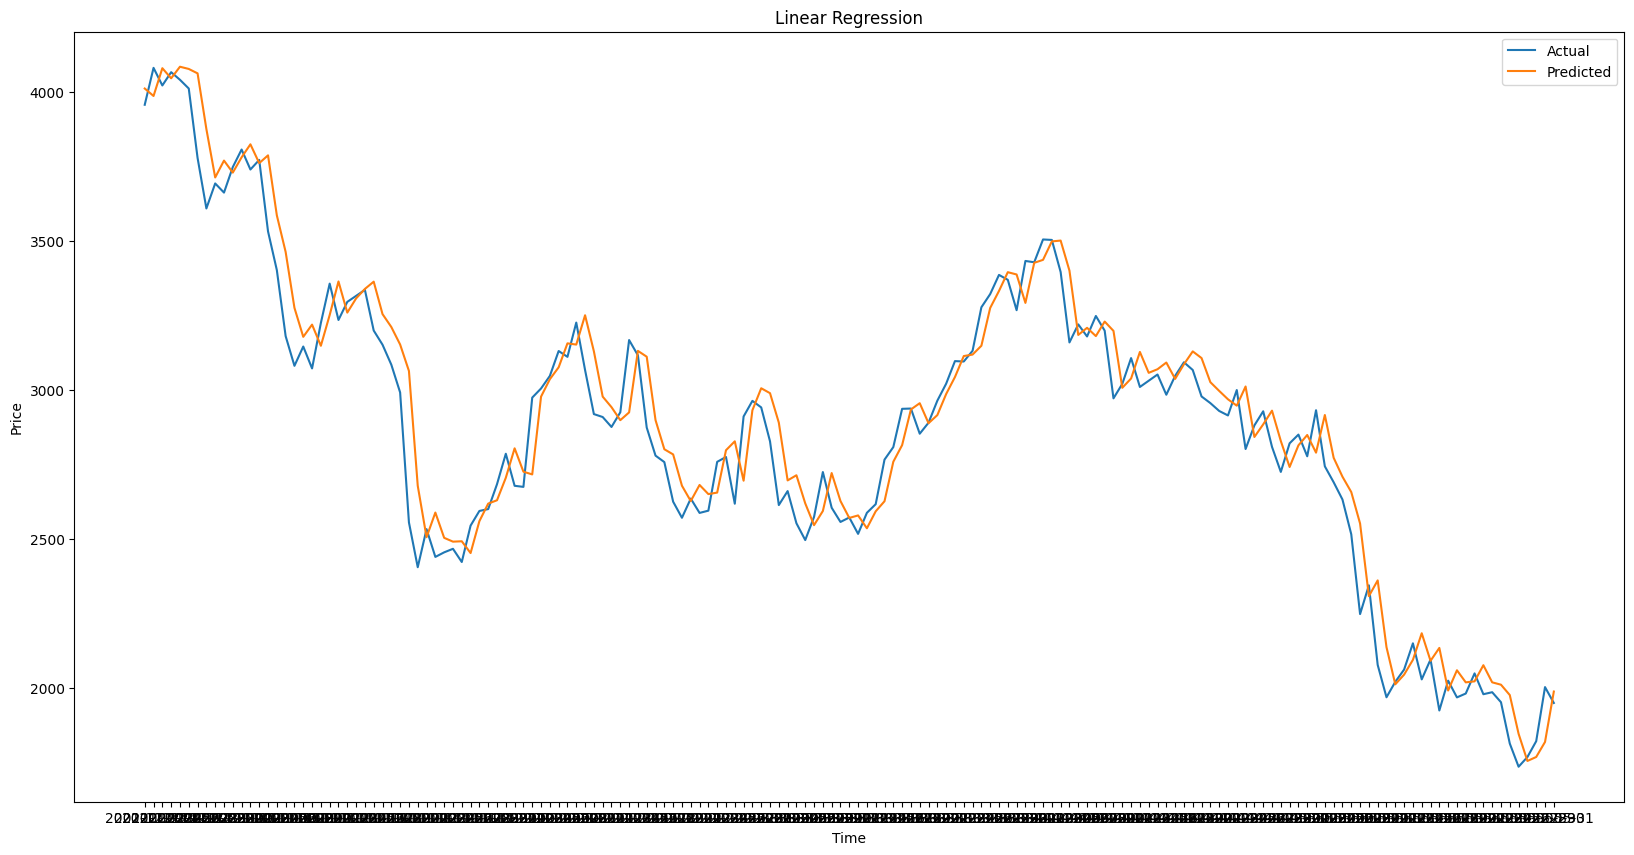

In [40]:
# Show 4 plots, one for each model and the actual values
# Then a final plot with all the models and the actual values

plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_LR'], label = 'Predicted')
plt.title('Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

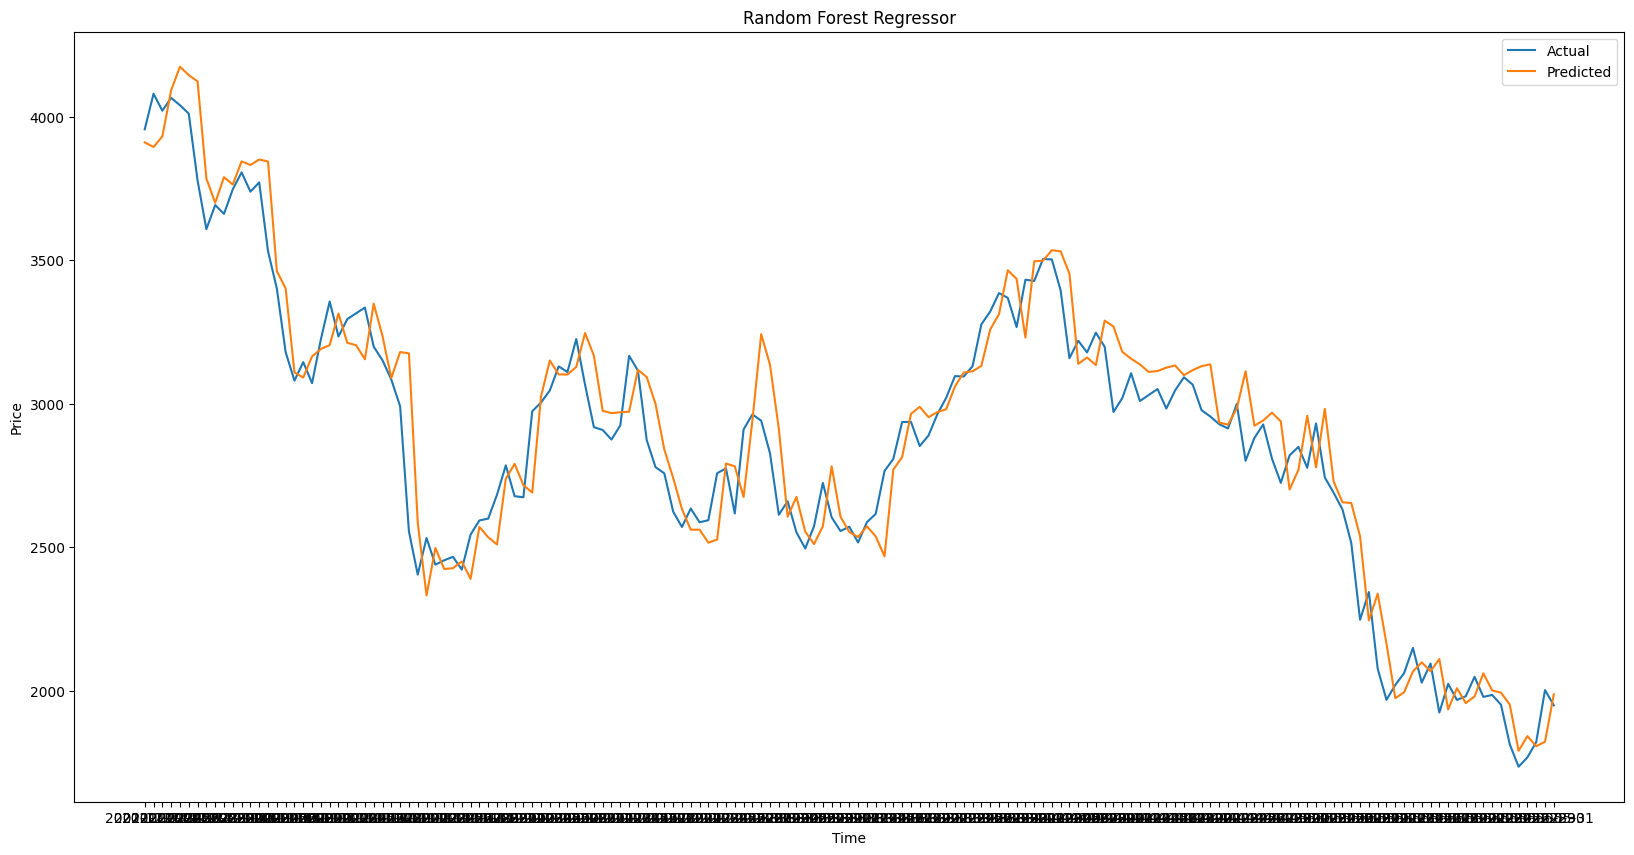

In [41]:
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_RFR'], label = 'Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

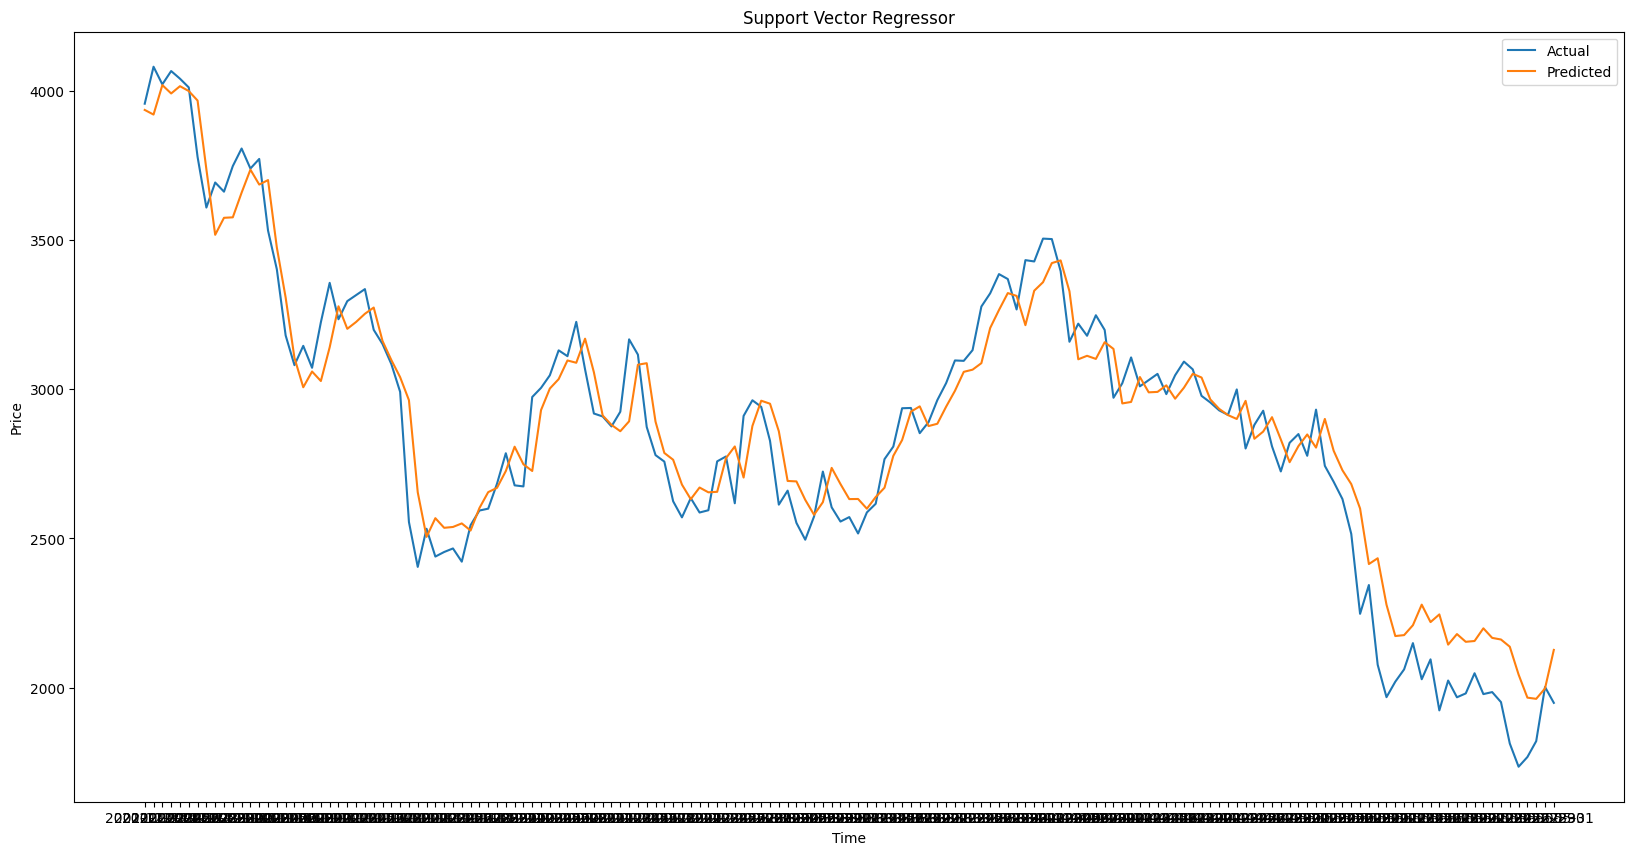

In [42]:
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_SVR'], label = 'Predicted')
plt.title('Support Vector Regressor')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

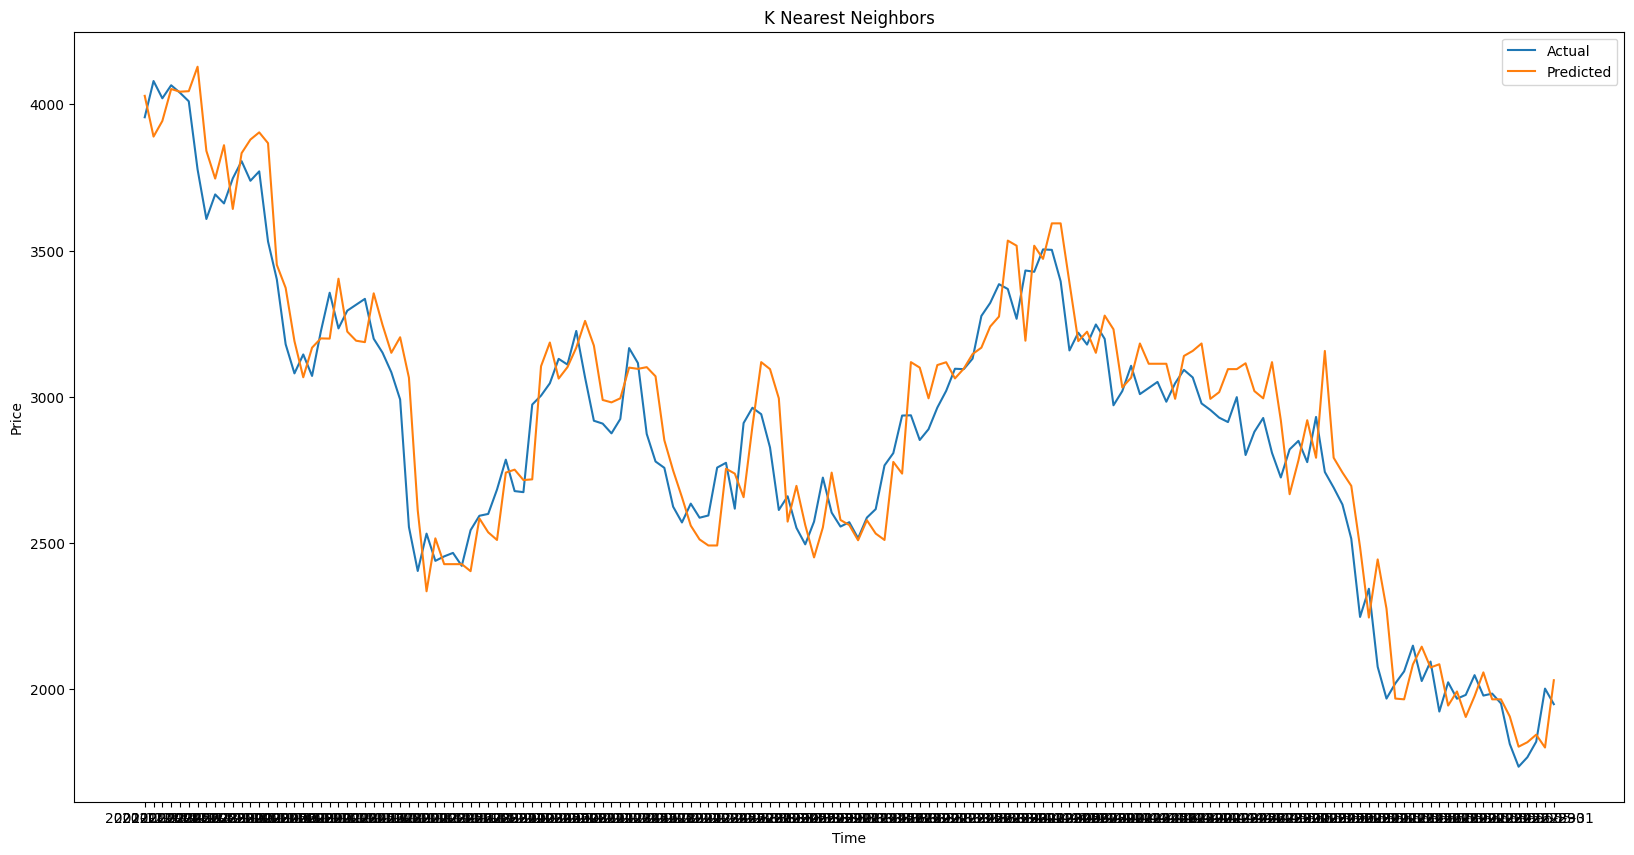

In [43]:
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_KNN'], label = 'Predicted')
plt.title('K Nearest Neighbors')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
# Calculating the root mean squared error and mean absolute error for each model

print("Linear Regression")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_LR'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_LR']))

print("Random Forest Regressor")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_RFR'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_RFR']))

print("Support Vector Regressor")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_SVR'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_SVR']))

print("K Nearest Neighbors")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_KNN'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_KNN']))

Linear Regression
Root Mean Squared Error:  123.19894426913437
Mean Absolute Error:  92.7115079278717
Random Forest Regressor
Root Mean Squared Error:  142.6207580219296
Mean Absolute Error:  108.57690780124356
Support Vector Regressor
Root Mean Squared Error:  133.55832849855383
Mean Absolute Error:  105.91461671331395
K Nearest Neighbors
Root Mean Squared Error:  153.5281960095928
Mean Absolute Error:  122.33886728029013
